# Clustering on Pycaret

Imports

In [1]:
import pycaret

In [2]:
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import scipy.stats as sts
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Dataset from zillow api 

* Dataset was cleaned in [EDA.ipynb]('EDA.ipynb')
* cook county IL filtered
* Values = mean price change over time
* index = neighborhoods (cook county IL only!!)
* columns = time = (YYYY/MM/DD) min=2000-01-31 / max=2022-02-28
* in this test we will test `chicago` individially as a beta test and determine the value of continuing with this method

In [3]:
#import dataset
data = pd.read_csv('Resources/cookcounty.csv')

In [4]:
data

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28
0,Chicago,165282.0,165621.0,166381.0,167702.0,169196.0,170566.0,172001.0,173594.0,175129.0,...,278732.0,281106.0,283652.0,287049.0,289393.0,291647.0,294440.0,297088.0,299729.0,301283.0
1,Cicero,128972.0,129220.0,129706.0,130518.0,131517.0,132603.0,133856.0,135013.0,136012.0,...,226907.0,229498.0,232578.0,235283.0,237289.0,238760.0,240861.0,243257.0,245957.0,247645.0
2,Arlington Heights,261429.0,261759.0,262735.0,264406.0,266390.0,267808.0,269428.0,271458.0,273819.0,...,390213.0,394921.0,400663.0,405699.0,408596.0,411208.0,414526.0,417568.0,420270.0,421782.0
3,Schaumburg,206420.0,206899.0,207706.0,208993.0,210318.0,211430.0,213118.0,215316.0,217632.0,...,318749.0,322037.0,325884.0,329969.0,332546.0,335233.0,338328.0,341091.0,343829.0,345585.0
4,Evanston,302592.0,302905.0,303645.0,304993.0,306863.0,308430.0,310211.0,312727.0,316042.0,...,502345.0,509733.0,518375.0,526181.0,532433.0,538210.0,544713.0,550440.0,554475.0,556319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Golf,511254.0,512519.0,515788.0,520828.0,524009.0,527693.0,529683.0,535512.0,537426.0,...,812506.0,837445.0,865139.0,879458.0,890257.0,898739.0,909127.0,919617.0,929894.0,935990.0
116,Hodgkins,146250.0,144877.0,145472.0,146342.0,148481.0,149861.0,150805.0,151201.0,152082.0,...,289536.0,292275.0,296267.0,299403.0,302809.0,304813.0,307362.0,308740.0,310763.0,311582.0
117,McCook,164992.0,162667.0,162618.0,162454.0,162897.0,163778.0,164053.0,165607.0,166947.0,...,279015.0,282892.0,288192.0,293391.0,297558.0,301130.0,304551.0,307136.0,309673.0,310853.0
118,Forestview,164312.0,163407.0,165091.0,166567.0,168339.0,169407.0,170902.0,172877.0,173073.0,...,236070.0,240865.0,245925.0,249961.0,252382.0,254337.0,256295.0,259127.0,261888.0,264583.0


In [5]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,session_id,4237
1,Original Data,"(120, 267)"
2,Missing Values,True
3,Numeric Features,266
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(120, 386)"
9,CPU Jobs,-1


In [6]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5416,375.9896,0.5173,0,0,0


In [7]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=4237, tol=0.0001, verbose=0)


In [8]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

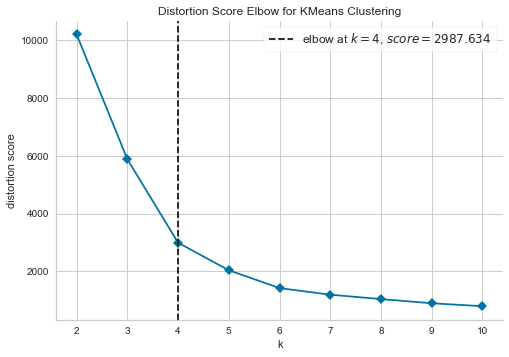

In [9]:
plot_model(kmeans, plot = 'elbow')

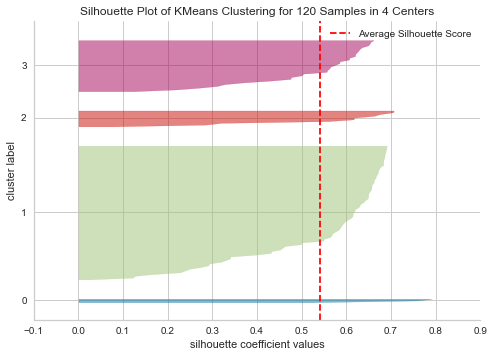

In [10]:
plot_model(kmeans, plot = 'silhouette')

In [11]:
result = assign_model(kmeans)
result.head()

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,Cluster
0,Chicago,165282.0,165621.0,166381.0,167702.0,169196.0,170566.0,172001.0,173594.0,175129.0,...,281106.0,283652.0,287049.0,289393.0,291647.0,294440.0,297088.0,299729.0,301283.0,Cluster 1
1,Cicero,128972.0,129220.0,129706.0,130518.0,131517.0,132603.0,133856.0,135013.0,136012.0,...,229498.0,232578.0,235283.0,237289.0,238760.0,240861.0,243257.0,245957.0,247645.0,Cluster 1
2,Arlington Heights,261429.0,261759.0,262735.0,264406.0,266390.0,267808.0,269428.0,271458.0,273819.0,...,394921.0,400663.0,405699.0,408596.0,411208.0,414526.0,417568.0,420270.0,421782.0,Cluster 3
3,Schaumburg,206420.0,206899.0,207706.0,208993.0,210318.0,211430.0,213118.0,215316.0,217632.0,...,322037.0,325884.0,329969.0,332546.0,335233.0,338328.0,341091.0,343829.0,345585.0,Cluster 3
4,Evanston,302592.0,302905.0,303645.0,304993.0,306863.0,308430.0,310211.0,312727.0,316042.0,...,509733.0,518375.0,526181.0,532433.0,538210.0,544713.0,550440.0,554475.0,556319.0,Cluster 3


In [12]:
predictions = predict_model(kmeans, data = data)
predictions.head()

,RegionName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,Cluster
0,Chicago,165282.0,165621.0,166381.0,167702.0,169196.0,170566.0,172001.0,173594.0,175129.0,...,281106.0,283652.0,287049.0,289393.0,291647.0,294440.0,297088.0,299729.0,301283.0,Cluster 1
1,Cicero,128972.0,129220.0,129706.0,130518.0,131517.0,132603.0,133856.0,135013.0,136012.0,...,229498.0,232578.0,235283.0,237289.0,238760.0,240861.0,243257.0,245957.0,247645.0,Cluster 1
2,Arlington Heights,261429.0,261759.0,262735.0,264406.0,266390.0,267808.0,269428.0,271458.0,273819.0,...,394921.0,400663.0,405699.0,408596.0,411208.0,414526.0,417568.0,420270.0,421782.0,Cluster 3
3,Schaumburg,206420.0,206899.0,207706.0,208993.0,210318.0,211430.0,213118.0,215316.0,217632.0,...,322037.0,325884.0,329969.0,332546.0,335233.0,338328.0,341091.0,343829.0,345585.0,Cluster 3
4,Evanston,302592.0,302905.0,303645.0,304993.0,306863.0,308430.0,310211.0,312727.0,316042.0,...,509733.0,518375.0,526181.0,532433.0,538210.0,544713.0,550440.0,554475.0,556319.0,Cluster 3


In [13]:
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  KMe

In [14]:
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['